## Name: Arpit Saxena

## Entry Number: 2018MT10742

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [4]:
data = pd.read_csv("2018MT10742.csv")["x"]

<AxesSubplot:>

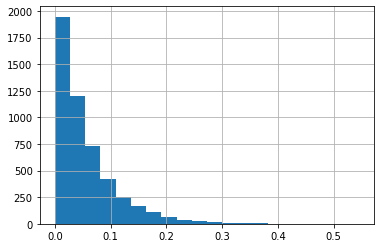

In [5]:
data.hist(bins=20)

<BarContainer object of 5 artists>

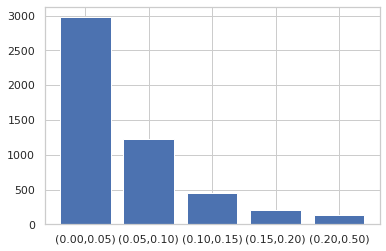

In [26]:
# Divide data into bins
vals, bin_ends = np.histogram(data.to_numpy(),bins=[0, 0.05, 0.1, 0.15, 0.2, 0.5])
bins = [f"({bin_ends[i]:.2f},{bin_ends[i+1]:.2f})" for i in range(len(bin_ends) - 1)]
plt.bar(bins, vals)

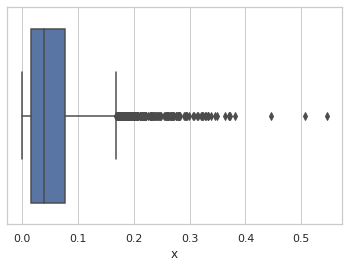

In [7]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data)

In [31]:
scipy.stats.binned_statistic(data, data, bins=10, )

BinnedStatisticResult(statistic=array([0.05542199]), bin_edges=array([2.13650573e-05, 5.45918198e-01]), binnumber=array([1, 1, 1, ..., 1, 1, 1]))

In [8]:
print(f"Mean = {data.mean()}")
print(f"Median = {data.median()}")
#print(f"Mode = {data.mode()}") Mode how?
print(f"Coefficient of variation = {np.sqrt(data.var()) / data.mean()}")
print(f"Skewness = {data.skew()}")
print(f"Kurtosis = {data.kurtosis()}")

Mean = 0.05542199485096252
Median = 0.03798825798245765
Coefficient of variation = 1.014388462069229
Skewness = 2.054355085588827
Kurtosis = 6.356203008806815


In [38]:
from scipy.stats import expon

_, l_inv = expon.fit(data)
lmbda = 1 / l_inv
print(f"Lambda = {lmbda}")

Lambda = 18.0503363179046


In [37]:
lmbda

18.0503363179046

In [44]:
def estimator_1(d):
    return len(d) / d.sum()
def estimator_2(d):
    return (len(d) - 1) / d.sum()
def estimator_3(d):
    return np.sqrt(1 / d.var())

In [45]:
print(f"Estimator 1 = {estimator_1(data)}")
print(f"Estimator 2 = {estimator_2(data)}")
print(f"Estimator 3 = {estimator_3(data)}")

Estimator 1 = 18.043377952907317
Estimator 2 = 18.039769277316736
Estimator 3 = 17.787443989752234


In [72]:
def get_interval(data, confidence):
    t_stat = scipy.stats.t.ppf(1 - confidence/2, len(data) - 1)
    mean = data.mean()
    var = data.var()
    n = len(data)
    diff = t_stat * np.sqrt(var) / np.sqrt(n)
    return 1 / np.array([mean + diff, mean - diff])

In [73]:
print(f"Confidence interval for 0.01 confidence: {get_interval(data, 0.01)}")
print(f"Confidence interval for 0.05 confidence: {get_interval(data, 0.05)}")
print(f"Confidence interval for 0.1 confidence: {get_interval(data, 0.1)}")

Confidence interval for 0.01 confidence: [17.40016384 18.73597151]
Confidence interval for 0.05 confidence: [17.54981219 18.56550887]
Confidence interval for 0.1 confidence: [17.6273579  18.47950948]
